### Code used for reading and converting raster files to array


#### This code provide an automatic read of Bilraster files into array, and then organize the data in a time series to be used for further analysis.

#### The code will read a total of Z .map files, and will reshape each file from a (X, Y) to a (1, X * Y), and will assing each file matrix to a different line. Therefore we will have a time-series matrix of (Z, X * Y) shape. 

Developed by: Thiago Victor Medeiros do Nascimento

In [1]:
from pcraster import *
import numpy as np
from osgeo import gdal, gdalconst
from osgeo import gdal_array
from osgeo import osr
import matplotlib.pylab as plt
import subprocess
import glob,os
import time
import rasterio
import tqdm

In [2]:
import pandas as pd

Firstly we pre-read our dataset:

#### (a) Data lecture:

In [3]:
path =r'D:\Brazil'
filenames = glob.glob(path + "/*.tif")
print("The total number of files is:", len(filenames))

The total number of files is: 492


Firstly we take a look on the dataset:

In [4]:
mapfile = filenames[0]

RasterLayer = rasterio.open(mapfile)

ncols = RasterLayer.width
nrows = RasterLayer.height

numtotal = nrows*ncols

print("The total number of grids in the dataset is:", numtotal)

The total number of grids in the dataset is: 706928


In [5]:
RasterLayer

<open DatasetReader name='D:/Brazil/198101.tif' mode='r'>

We create one array to be filled:

In [6]:
precmongrids = np.zeros((len(filenames),numtotal),dtype=np.float32)
precmongrids.shape

(492, 706928)

Now we proceed with the data lecture and organization:

In [7]:
start = time.time()
i = 0
for mapfile in tqdm.tqdm(filenames):

    #namewithmap = os.path.basename(mapfile)
    #namemap = namewithmap.replace(".bil", "")
    #namemap = namemap.replace("dnchirps", "")
    
    
    RasterLayer = rasterio.open(mapfile)
    mapreadarray = RasterLayer.read()[0,:,:]
    mapreadarrayres = np.reshape(mapreadarray, (1, numtotal))
    precmongrids[i,:] = mapreadarrayres
    
    i = i + 1
end = time.time()
print(end - start)

100%|████████████████████████████████████████████████████████████████████████████████| 492/492 [00:30<00:00, 16.32it/s]

31.00029230117798


In [8]:
precmongrids.shape

(492, 706928)

In [9]:
precmongridsdf = pd.DataFrame(index = pd.date_range(start='1-1981', end='1-2022', freq='M') , data = precmongrids)

In [10]:
precmongridsdf

,0,1,2,3,4,5,6,7,8,9,...,706918,706919,706920,706921,706922,706923,706924,706925,706926,706927
1981-01-31,30.584356,34.519100,38.785252,26.112749,23.980488,20.003992,15.022127,15.626489,14.133712,14.171497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-02-28,46.643436,39.725986,51.025692,48.500080,42.978764,33.846756,20.691046,22.545143,30.237711,28.758938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-03-31,57.016598,43.683773,44.807487,38.668465,36.771725,38.684311,28.552063,27.170506,34.262955,33.725010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-30,211.826675,175.127838,167.563416,147.843781,138.102203,146.548187,148.544098,157.608521,151.324326,151.948730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-05-31,223.550934,218.187012,201.823990,173.988495,167.295471,137.311386,130.737701,131.703125,172.292252,170.046921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,71.643860,70.321022,70.388138,77.243126,82.305260,80.634026,92.535370,100.937546,111.267273,130.113235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30,52.440594,48.126659,48.827576,45.576454,45.240108,43.783012,43.998020,49.927898,55.770870,63.686245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-31,191.343994,166.132996,162.255737,142.179367,127.634857,135.621979,129.878113,132.456665,119.081345,112.635231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-11-30,102.808296,82.712013,80.548279,75.030624,77.780411,77.458267,69.424477,66.329636,59.393471,55.671310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we export our dataset to a .CSV to be easily opened afterwards:

In [11]:
#np.savetxt(r'C:\Users\User\OneDrive\Projects\Y2022\SPI\cooperacao_raul_e_Thiago\precmongrids.csv', precmongrids, delimiter=',')

If we want to save our datafrane in a .XLSX file:

In [12]:
#precmongridsdf.to_excel(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\precmongrids.xlsx')

#### (b) SPI computation for each grid:

In [13]:
import standard_precip
from standard_precip import spi

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
spi_rain = spi.SPI()

In [16]:
#data = pd.read_csv(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\precmongrids.csv')
data = precmongridsdf

data.index.rename('date', inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,706918,706919,706920,706921,706922,706923,706924,706925,706926,706927
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,30.584356,34.519100,38.785252,26.112749,23.980488,20.003992,15.022127,15.626489,14.133712,14.171497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-02-28,46.643436,39.725986,51.025692,48.500080,42.978764,33.846756,20.691046,22.545143,30.237711,28.758938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-03-31,57.016598,43.683773,44.807487,38.668465,36.771725,38.684311,28.552063,27.170506,34.262955,33.725010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-30,211.826675,175.127838,167.563416,147.843781,138.102203,146.548187,148.544098,157.608521,151.324326,151.948730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-05-31,223.550934,218.187012,201.823990,173.988495,167.295471,137.311386,130.737701,131.703125,172.292252,170.046921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,71.643860,70.321022,70.388138,77.243126,82.305260,80.634026,92.535370,100.937546,111.267273,130.113235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30,52.440594,48.126659,48.827576,45.576454,45.240108,43.783012,43.998020,49.927898,55.770870,63.686245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-31,191.343994,166.132996,162.255737,142.179367,127.634857,135.621979,129.878113,132.456665,119.081345,112.635231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data.reset_index(inplace = True)
data

,date,0,1,2,3,4,5,6,7,8,...,706918,706919,706920,706921,706922,706923,706924,706925,706926,706927
0,1981-01-31,30.584356,34.519100,38.785252,26.112749,23.980488,20.003992,15.022127,15.626489,14.133712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1981-02-28,46.643436,39.725986,51.025692,48.500080,42.978764,33.846756,20.691046,22.545143,30.237711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1981-03-31,57.016598,43.683773,44.807487,38.668465,36.771725,38.684311,28.552063,27.170506,34.262955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1981-04-30,211.826675,175.127838,167.563416,147.843781,138.102203,146.548187,148.544098,157.608521,151.324326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1981-05-31,223.550934,218.187012,201.823990,173.988495,167.295471,137.311386,130.737701,131.703125,172.292252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2021-08-31,71.643860,70.321022,70.388138,77.243126,82.305260,80.634026,92.535370,100.937546,111.267273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,2021-09-30,52.440594,48.126659,48.827576,45.576454,45.240108,43.783012,43.998020,49.927898,55.770870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,2021-10-31,191.343994,166.132996,162.255737,142.179367,127.634857,135.621979,129.878113,132.456665,119.081345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,2021-11-30,102.808296,82.712013,80.548279,75.030624,77.780411,77.458267,69.424477,66.329636,59.393471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
numgrids = data.shape[1] - 1
numgrids

706928

In [19]:
# In our case that the columns are not set as str, we must force it:
data.columns = data.columns.astype(str)

In [20]:
data2 = data.loc[:, ["date", str(grid)]]

NameError: name 'grid' is not defined

In [ ]:
aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=3, fit_type="lmom", dist_type="gam") 

In [ ]:
spi3.iloc[:, grid] = aux.iloc[:,2] 

In [21]:
spi3 = np.empty([492, ])
spi6 = np.empty([492, ])
spi9 = np.empty([492, ])
spi12 = np.empty([492, ])
spi24 = np.empty([492, ])
spi48 = np.empty([492, ])

In [22]:
start = time.time()
    
for grid in tqdm.tqdm(range(numgrids)):
#for grid in tqdm.tqdm(range(1)):

    data2 = data.loc[:, ["date", str(grid)]]

    # SPI-1
    #aux = spi_rain.calculate(data, 'date', str(grid), freq="M", scale=1, fit_type="lmom", dist_type="gam")    
    #spi1.iloc[:, grid] = aux.iloc[:,2]    
    #data.drop(data.columns[-1], axis=1, inplace = True)
    
    # SPI-3
    aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=3, fit_type="lmom", dist_type="gam")    
    spi3 = np.vstack((spi3,aux.iloc[:,2].values))
    
    # SPI-6
    aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=6, fit_type="lmom", dist_type="gam")    
    spi6 = np.vstack((spi3,aux.iloc[:,2].values))  
    
    # SPI-9
    aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=9, fit_type="lmom", dist_type="gam")    
    spi9 = np.vstack((spi3,aux.iloc[:,2].values))
    
    # SPI-12
    aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=12, fit_type="lmom", dist_type="gam")    
    spi12 = np.vstack((spi3,aux.iloc[:,2].values))
    
    # SPI-24
    aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=24, fit_type="lmom", dist_type="gam")    
    spi24 = np.vstack((spi3,aux.iloc[:,2].values))

    # SPI-48
    aux = spi_rain.calculate(data2, 'date', str(grid), freq="M", scale=48, fit_type="lmom", dist_type="gam")    
    spi48 = np.vstack((spi3,aux.iloc[:,2].values))    
    
end = time.time()
print(end - start)

  1%|▉                                                                      | 9379/706928 [1:04:30<79:57:57,  2.42it/s]


KeyboardInterrupt: 

In [167]:
np.savetxt(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\spi1.csv', spi1, delimiter=',')

In [168]:
np.savetxt(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\spi3.csv', spi3, delimiter=',')

In [169]:
np.savetxt(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\spi6.csv', spi6, delimiter=',')

In [170]:
np.savetxt(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\spi9.csv', spi9, delimiter=',')

In [171]:
np.savetxt(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\spi12.csv', spi12, delimiter=',')

In [172]:
np.savetxt(r'C:\Users\User\OneDrive\IST\RESEARCH\5_SPI\rondonia\spi24.csv', spi24, delimiter=',')

In [ ]:
fig, axes = plt.subplots(nrows=5, figsize=(25, 14))
plt.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col_scheme=np.where(data['spi_'+str(tipos_de_spi[i])]>0, 'b','r')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.bar(data.index, data['spi_'+str(tipos_de_spi[i])], width=25, align='center', color=col_scheme, label='SPI '+str(tipos_de_spi[i]))
    ax.axhline(y=0, color='k')
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=70)
    ax.set_yticks(range(-3,4), range(-3,4))
    ax.set_ylabel('SPI'+str(tipos_de_spi[i]), fontsize=12)
    
    if i<len(tipos_de_spi)-1:
        ax.set_xticks([],[])
        
#plt.savefig('spis_pb_1958_2021.jpg', dpi = 600)

# fig.savefig('spis_pb_1958_2021.png', format='png', dpi=600)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
463    0.680686
464    0.632120
465    0.746867
466    0.689357
467    0.534421
Length: 468, dtype: float64

In [190]:
SPI24mean = pd.DataFrame(index = spi24.index)

In [191]:
SPI24mean["date"] = data["date"]
SPI24mean["meand"] = spi24.T.mean()

<AxesSubplot: >

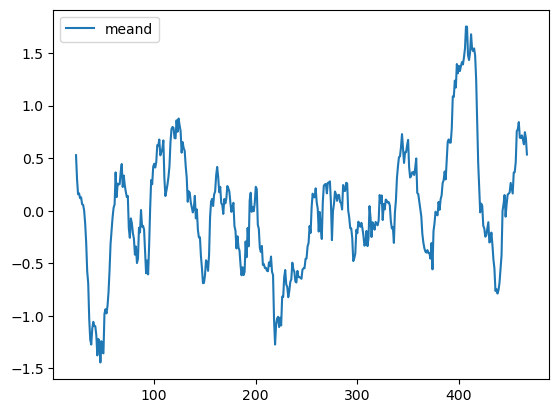

NameError: name 'mdates' is not defined

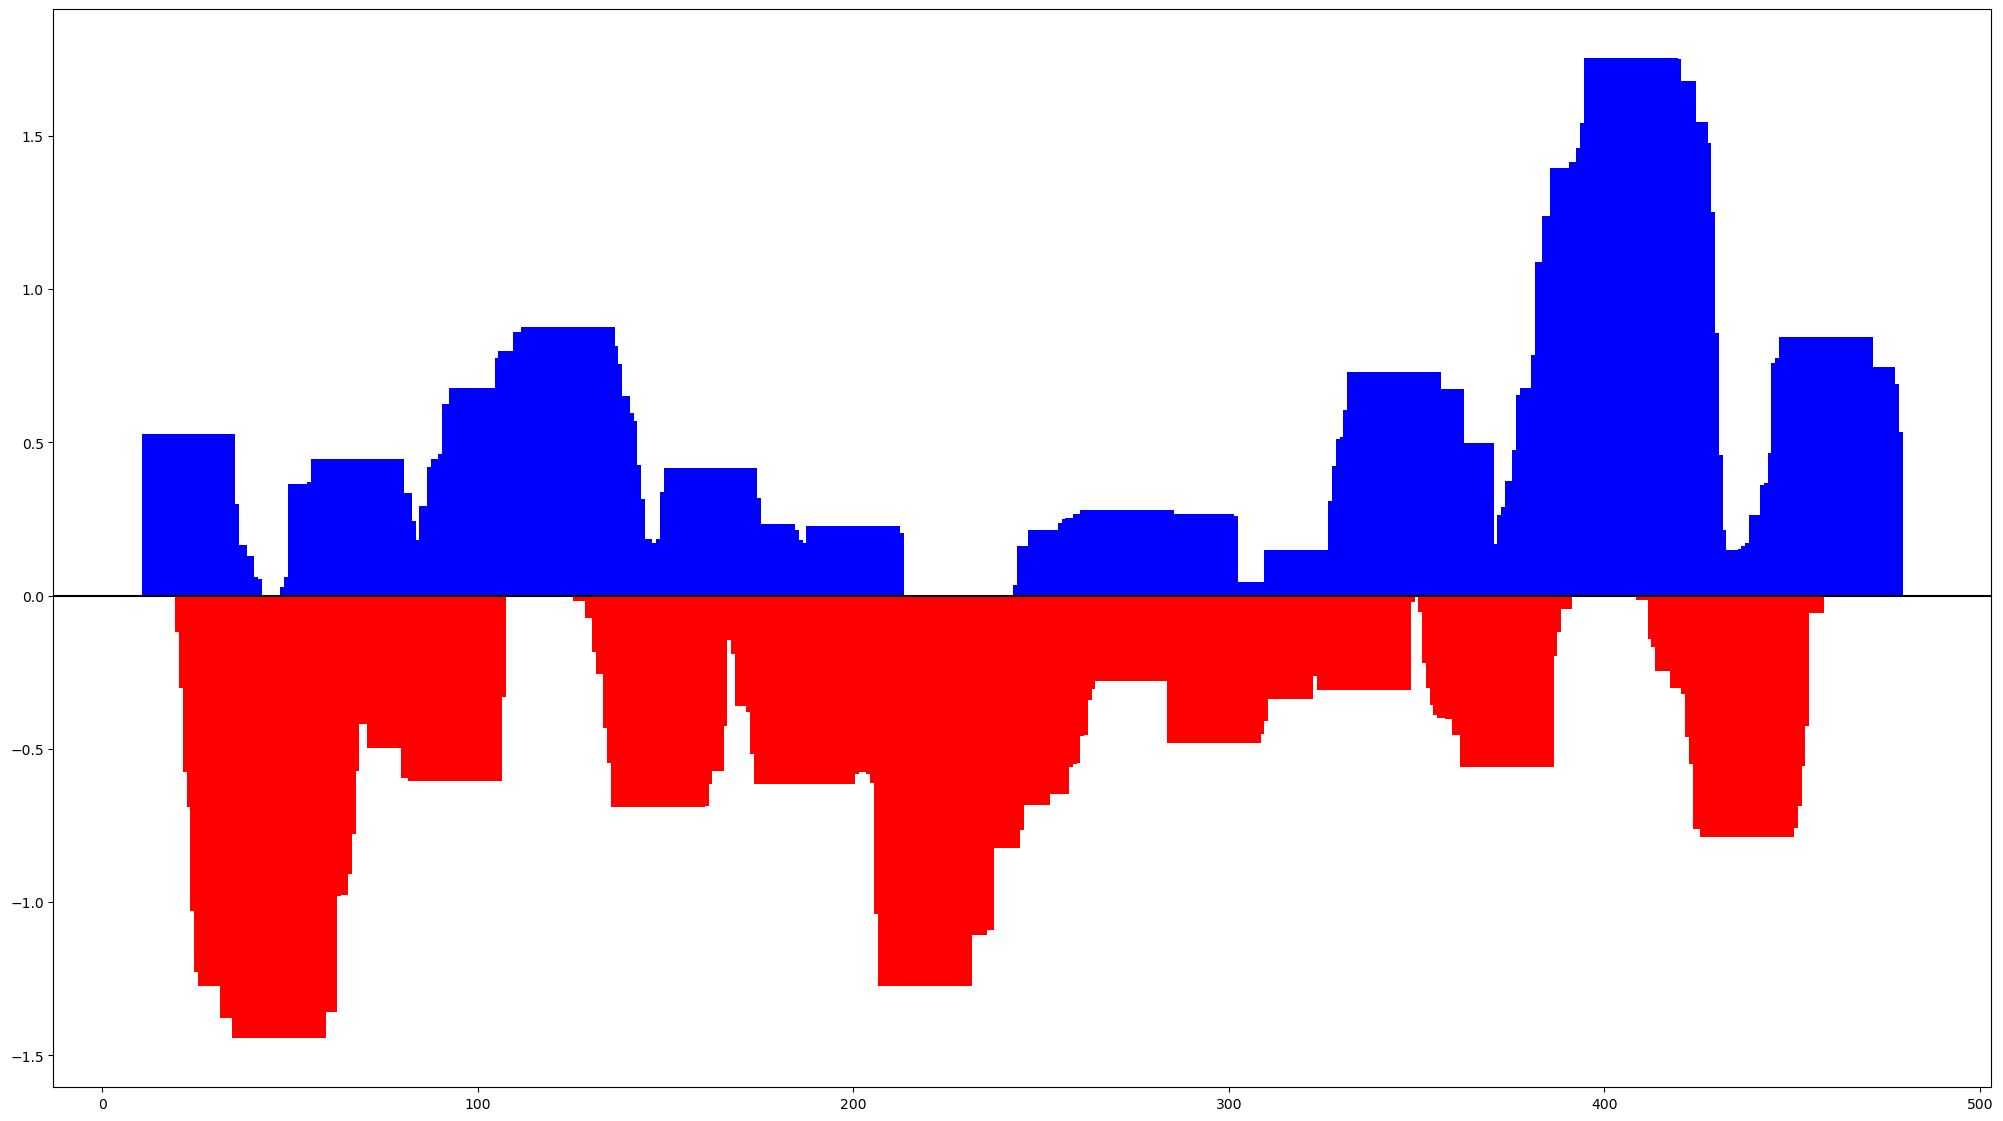

In [200]:
fig, axes = plt.subplots(nrows=1, figsize=(25, 14))
plt.subplots_adjust(hspace=0.25)
ax = axes 
col_scheme=np.where(SPI24mean['meand'] > 0, 'b','r')

#ax.xaxis.set_major_formatter(SPI24mean['date'].DateFormatter('%Y'))
ax.bar(SPI24mean.index, SPI24mean['meand'], width=25, align='center', color=col_scheme, label='SPI 24')
ax.axhline(y=0, color='k')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.legend(loc='upper right')
ax.tick_params(axis='x', rotation=70)
ax.set_yticks(range(-3,4), range(-3,4))
#ax.set_ylabel('SPI'+str(tipos_de_spi[i]), fontsize=12)

TypeError: 'AxesSubplot' object is not iterable

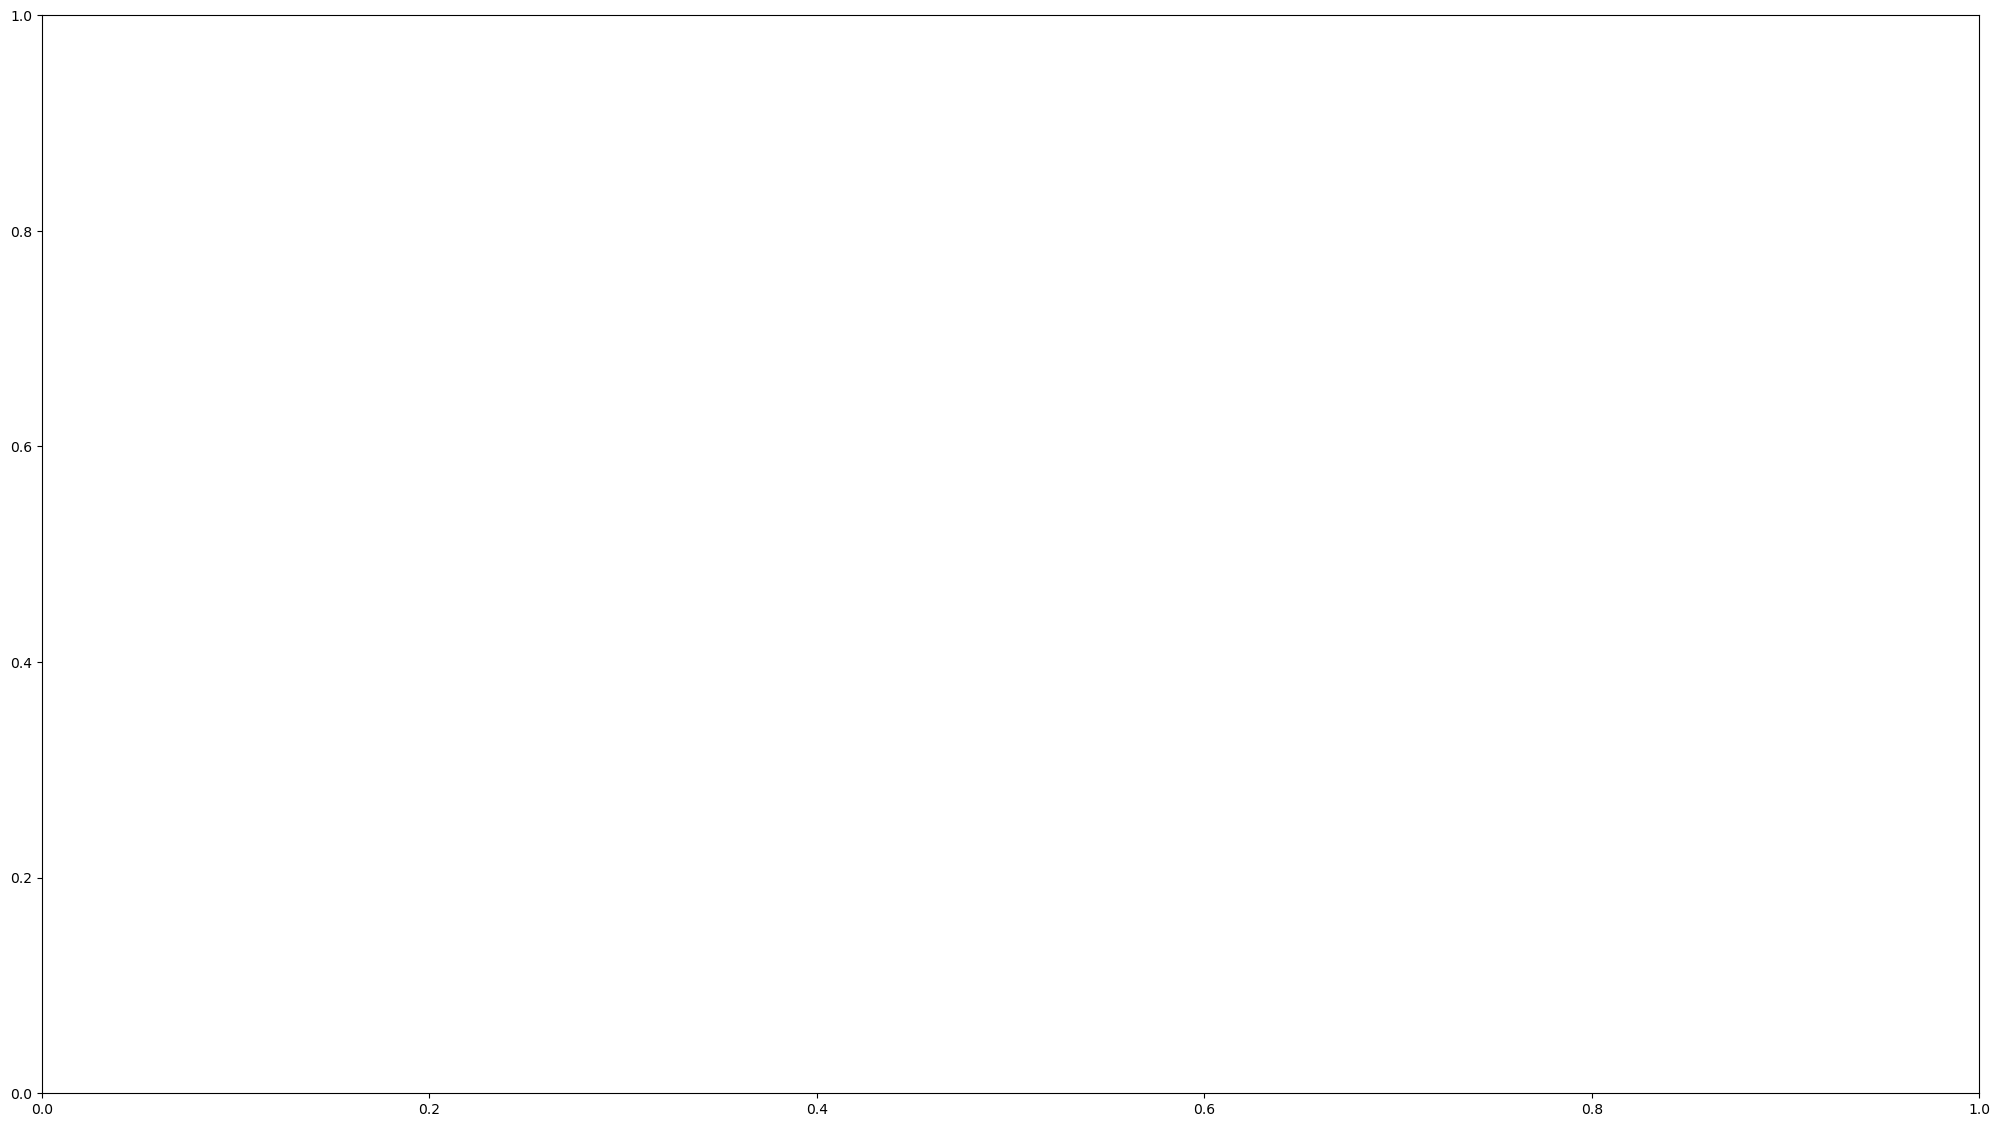

In [196]:
fig, axes = plt.subplots(nrows=2, figsize=(25, 14))
plt.subplots_adjust(hspace=0.25)
#for i, ax in enumerate(axes):
for i, ax in enumerate(axes):
    col_scheme=np.where(SPI24mean['meand'] > 0, 'b','r')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.bar(SPI24mean.index, SPI24mean['meand'], width=25, align='center', color=col_scheme, label='SPI 24')
    ax.axhline(y=0, color='k')
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=70)
    ax.set_yticks(range(-3,4), range(-3,4))
    #ax.set_ylabel('SPI'+str(tipos_de_spi[i]), fontsize=12)
    
    if i<len(tipos_de_spi)-1:
        ax.set_xticks([],[])
        
#plt.savefig('spis_pb_1958_2021.jpg', dpi = 600)

# fig.savefig('spis_pb_1958_2021.png', format='png', dpi=600)